In [8]:
### GROUP 11
## C50 Model

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [57]:
# Load Titanic dataset 
df = pd.read_csv('C:/Users/aditi/Downloads/archive/train.csv')

print(df[df.isna().any(axis=1)]) # show any missing values 
df.info()
df.head()

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [70]:
df['target'] = df['target'].astype('object')
df['sex'] = df['target'].astype('object')
##df_num= df.select_dtypes(exclude='object')
df_num = df[['sex']]
df_obj = df.drop(columns=['sex'])
##df_num = [['']]

#df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1025 non-null   object
dtypes: object(1)
memory usage: 8.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   cp        1025 non-null   int64  
 2   trestbps  1025 non-null   int64  
 3   chol      1025 non-null   int64  
 4   fbs       1025 non-null   int64  
 5   restecg   1025 non-null   int64  
 6   thalach   1025 non-null   int64  
 7   exang     1025 non-null   int64  
 8   oldpeak   1025 non-null   float64
 9   slope     1025 non-null   int64  
 10  ca        1025 non-null   int64  
 11  thal      1025 non-null   int64  
 12  target    1025 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage:

target_1
True     526
False    499
Name: count, dtype: int64


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target_1
0,52,0,125,212,0,1,168,0,1.0,2,2,3,False
1,53,0,140,203,1,0,155,1,3.1,0,0,3,False
2,70,0,145,174,0,1,125,1,2.6,0,0,3,False
3,61,0,148,203,0,1,161,0,0.0,2,1,3,False
4,62,0,138,294,1,1,106,0,1.9,1,3,2,False


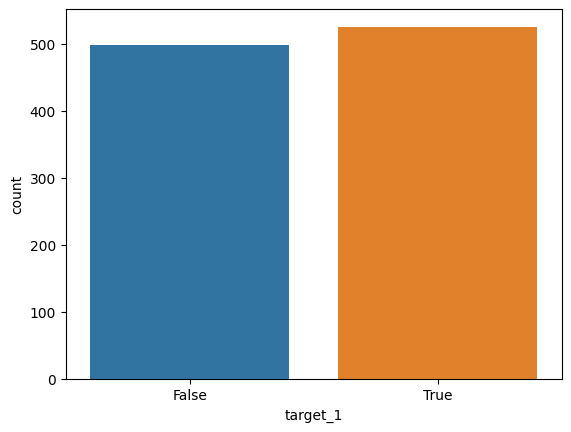

In [71]:
df_obj= pd.get_dummies(df_obj, drop_first=True)
print(df_obj['target_1'].value_counts())
sns.countplot(data=df_obj, x='target_1')
df_obj.head()

In [72]:
attr = df_obj.drop('target_1', axis=1)
print(attr)
target = df_obj['target_1']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

      age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0      52   0       125   212    0        1      168      0      1.0      2   
1      53   0       140   203    1        0      155      1      3.1      0   
2      70   0       145   174    0        1      125      1      2.6      0   
3      61   0       148   203    0        1      161      0      0.0      2   
4      62   0       138   294    1        1      106      0      1.9      1   
...   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
1020   59   1       140   221    0        1      164      1      0.0      2   
1021   60   0       125   258    0        0      141      1      2.8      1   
1022   47   0       110   275    0        0      118      1      1.0      1   
1023   50   0       110   254    0        0      159      0      0.0      2   
1024   54   0       120   188    0        1      113      0      1.4      1   

      ca  thal  
0      2     3  
1      0     3  


In [73]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,splitter='best',max_leaf_nodes=5)

In [74]:
attr_train.head()
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.8311688311688312  

 Confusion Matrix:
[[104  37]
 [ 15 152]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.74      0.80       141
        True       0.80      0.91      0.85       167

    accuracy                           0.83       308
   macro avg       0.84      0.82      0.83       308
weighted avg       0.84      0.83      0.83       308



In [79]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);